In [13]:
source("src/shared.R")

## Theory

#### Main contributions of Athey, Imbens, Wager and Tibshirani:

- set of conditions under which predictions made by random forests (regression case) are both asymptotically unbiased and normal
- direct extension to so called "causal forests", i.e. random forests specialised in predicting conditional average treatment effects
- underlying idea/hope: the coupling of good (empirical) finite sample performance of RFs in environments with many covariates/complex interactions and rigorous asymptotic analysis (inference)
- desirable empirical properties of regression forests: stability, ease of use, and flexible adaptation to different functional forms as in, e.g., **Biau and Scornet (2016)** or **Varian (2014)**
- extension to estimation and inference on generic parameters identified by general moment-conditions

### The evolution of causal forests - start of the journey:

**Estimation and Inference of Heterogeneous Treatment Effects using Random Forests, 2018 (S. Wager, S. Athey)**

1. How do we build individual trees for treatment effect estimation, i.e. what splitting-criterion to use?
2. Which assumptions while building trees do we need for pointwise consistency and asymptotic normality at $\hat{\tau}_n(x)$?
3. How are individual trees aggregated into forests, i.e. how do we make predicitions at a new point $x$?
4. Sketching the proof of asymptotic normality - moved to end.


1. **Recap for regression trees**: Given $n$ observations of pairs $Z_i = (X_i,Y_i)_{i=1}^n$, where $X_i$ is a $d$-dimensional vector of covariates and $Y_i$ the response, define $j$ as a potential splitting variable, $s$ a split point and $C_1(j,s)$, $C_2(j,s)$ the induced child nodes:

\begin{equation}
C_1(j,s) := \left\{X \mid X^j < s \right\} \quad \text{and} \quad C_2(j,s) := \left\{X \mid X^j > s \right\}
\end{equation}
- CART solves the following minimization problem in each step:
\begin{align*}
& \min_{j,s} \left\{ \sum_{i:X_i \in C_1(j,s)} (Y_i - \bar{Y}_1)^2 + \sum_{i:X_i \in C_2(j,s)} (Y_i - \bar{Y}_2)^2 \right\} \\
\iff & \min_{j,s} \left\{ \sum_{i=1}^n Y_i^2 - \left( \sum_{i:X_i \in C_1(j,s)} \bar{Y}_1^2 + \sum_{i:X_i \in C_2(j,s)} \bar{Y}_2^2 \right) \right\}
\end{align*} 


- Letting 
\begin{equation}
\hat{\mu}^{js}(X_i) = 
\begin{cases} 
      \bar{Y}_1 & X_i \in C_1(j,s) \quad \implies \max_{j,s} \left\{ \sum_{i=1}^n \hat{\mu}^{js}(X_i)^2 \right\} \\
      \bar{Y}_2 & X_i \in C_2(j,s)
   \end{cases}
\end{equation}
- And thus, given a (naive) estimator for $\hat{\tau}^{js}(X_i)$ at each child node for given $j,s$, namely:
\begin{equation} \hat{\tau}^{js}(X_i) = \frac{1}{\vert \{k: W_k = 1, X_k \in C_{js}(X_i)) \} \vert } \sum_{\{k: W_k = 1, X_k \in C_{js}(X_i)\}} Y_k \\ - \frac{1}{\vert \{k: W_k = 0, X_k \in C_{js}(X_i) \} \vert } \sum_{\{k: W_k = 1, X_k \in C_{js}(X_i)\}} Y_k
\end{equation}
- We use the same idea of maximizing the sum of squares (as in the regression case):
\begin{equation}
\max_{j,s} \left\{ \sum_{i=1}^n \hat{\tau}^{js}(X_i)^2 \right\}
\end{equation}

In [6]:
show_video("img/split.mp4", "video/mp4")

<video controls src="data:video/mp4;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAGKmBtZGF0AAACqgYF//+m3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE1NSByMjkxNyAwYTg0ZDk4IC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxOCAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTEgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDMgbWU9ZGlhIHN1Ym1lPTEgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MCBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTAgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9MCB0aHJlYWRzPTE3IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0xIGtleWludD0yNTAga2V5aW50X21pbj0yNSBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmM9Y3JmIG1idHJlZT0wIGNyZj0yMy4wIHFjb21wPTAuNjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIHBiX3JhdGlvPTEuMzAgYXE9MToxLjAwAIAAAAcEZYiEABL/5P8F4PqBgXFsH9vuRCs33jvzTKoTnsl346t8h3L2Ou4QAAADAAADAAADAAAaYwKHPFjB8BU6UkvwY6KM99EhD8XmHctcajpeyuEIUP3CqysvXOHtvdVRJwWyt7n3AoxugInCTrMaWTmLZ6gdekzCbmZ/qohbOh86grYuDv1FFXlpFn2vauaw/qH8qUINtil5HpHyO61x2w9yvd6Uwcz/dmThW+2vApXkkRArif8reJjsHtz68lu52SXNUJNltqXy3GtRA7eon0Tq8bMJD1LHGmn0S077n8WAgb9oh0eLJqp1gAAAAwDv3vbwZPxF5oswKn8faaCU0uCGCV4GG4ch5et3TJ1K8AjQ26iU4kfqhOu/q/PAps8wPZ/+V6rtNC7zmjfEVtCrLxd7D9lxdMbUe5P+PmoatXDkOu2wH5sKp6BSutavDUvgghoF10EKntL6/ET2or8zRSEFnGWXjx6Xt2unsC1366e/guAFD5upebq0VnLxA52y303LG8Ssn5dRe+Ds2hxbH7N9X2LDg0QQw4pvI437JjWYOmfGEAbmq/4Ly0eWJ8cU3mty2BpQucm6tMFPLO5vgdPJ4aboznyVjINAYz2SNomyaFz+dQE4VpHbUHvSTIrJLAMmuO4ddoU0uwpbd87OFihO4PzAtAXAyAXzsmMqOKLlfACN0W72qtxOatqY1+rojg1r7FpiRCmTeyw8segsjZlPHg2KVFzfluga1eIGRnbpXRD22IBpjCnLa8IDsG/n4hLHdJfLmSeBpqcb/yqtLzKikBIEQEqDzSnCZz45wOzZ1yGzmlDoe8bXjc3IQ1Ba8NFLLIwuWhKTY2gw9brXeC+lw8SUsrsB/+4DPXMG0pbePQ8OZegv/45jbkYJcrkgcZWm8PqZGf7MTPDUtfFpF3qGJXnX8GM9QAKlknvoHHlbZhvTU4OEtyOLEAITjnipqJeDB4oX6KqGG+l1evHQ8/r3xV2AHh7TCX9vY069rYFwQXNeUpwNKqWV8iVppFqh2lt0JOvAkCijvz3f2PAtVam3z7c35yfb4C1LFXkE7Zo9VLKqi6izH9Q/OVh6L4im7cXAaUSo0gnm6WEPuV/0satAnz6CazmyjZ5hCuPHpxs8+G0Q2s1tsdSNkrEp7LnP2qxb5j+JOiowr886BB6DqKm32hiwnHV4ajrApervXqgvEUnSRnZ6sftfgR7X8pI2x1lbqS2A65gjWSi8vU/fxQUZYB5q6E2YlQCLEM5Wnm6/IS8JwczFus2MhU5YgjjGJXaduFfBPEl6uuAYGNKeYel7tJAYf1tcbRFIWLRqCZCL4EUrNAAxex8TgWjPYUn37kuaXM90IaKnUnCMBIkNOIKoHXkaR1pOkEERe5Qk1z4idHq4hd83aLIjwFCFQDFP+3D1wueizNKvUpFiiRz3dCRYZ4idGSqJHHAYuAXTZYz3VcCkVCucwckB6kHkEch4KW319QACxIU4ZC+od7ThzCkyO60W3SPiOaMOiwbXWJiRb1Ntv1bifLt64A9wuTs4uecJwR+23wpRBo9DxPfK9KTGYF9PBDjOqgYmKZLxxvFaaCmh2yoBd+ALS0QTbbM9EakOfZ4kTWD5cmNVuG66ptSwKEHNSHSSvDXJnphubLaYZAH5/JK/yWEcez5DwpbJl47SgAr2x9WWWZFXz997trx96t/v86uA2/5CDA6cJP7iwGi5ZWurnU19wApduE8HNGuEEddu3oZKwOZ98VQWqrVMLGcFsoCMjK7ht7ObMA6QPR/6Clr2wOGeGRsOORLm52GI3ruvls/3mvT3YMjYbXBD9xuFTS/et50lKu7+4zojcvkHipkgSxwhH9anL1l2r+5NvFZ59YPoqmlMRMo8SZs0uqnujPJIGvg0AKHfAoREIWytplAKgNHh3ASVfLXPSUd4EBM/7KsH02emjxD5LzWUzl3UM47njzFFtykQUk0OMva+sXHdMMViSU1bdF+QwMCCiU6YOIBIX2GAAAAg94FM/AWgkqp27on/qg/GMkd09GlAloHpW3drjkyocklZ1I9MEpUzuel0D051RTyOEKXzs+D27Nz7cPrxW01eEfa4ymup9OJO/qGZQCYFHmgTYm8BvRyrNzfZiE5NkHTe5N0YstGRkEz5HJGl5DjQdkRjtkekSsM57hR1TTq4myUnrOJc2D+Jr64K4MYXWKBs+/fsJGAVquvmHfCVg1QMurs2XqOug5Q1svvXnFALPvjtB3UAZsUfnGpzqVYstuATxj5ioBvI6eR1HXKTnOdo1/jlgAAAEo/5X7ST3SRcSvr9RsliU6Z9IeJL7swEW6IASDrTQmHyuKyPhhb4QAEMAGQAP4AzACPAIYAcoBeAFgAYQBjAGQAXQBDAFIATQFGl5S//57eJYbEAAAB2QZokGIJ//rUqgCaHkoACpE4XUmIjwwOyt3xnGeM9ldzx7gmDL0r37x7uRn1V1Xh24gzEd2lT4iuPByqIG/SLlaSfGzjsYi+zJxPsUHsHdsyFaHyrsbyaIMLwbX2MSvGnRir2BRZKQxeBmg2NadydcAAAAwAl4AAAABVBnkJCCX8AAAMAAAMAAAMAAAMAA9MhAANAaBwAAAAVAZ5hRBH/AAADAAADAAADAAADAAUkIQADQGgcIQADQGgcAAAAFQGeY0QR/wAAAwAAAwAAAwAAAwAFJSEAA0BoHAAAAI5Bmmg0TEFP/taMsAHq+oVlyxQAsjN/lvar6HGbR46OWMQ4pawFkh/hl1nnAhCJHXRXEJK87X9r3qWFY7OQtqf62wPlion/SMYuvtQbzQO92HoHm/4VvN2kcE+s08dsFFhdkEmk061gpM/Km3+CiUpd/Of29PGMdl1H4e28Ugk9pUnl99klA+BgAAADANmBIQADQGgcIQADQGgcAAAAF0GehkURLBL/AAADAAADAAADAAADAAPTIQADQGgcAAAAFQGepUQR/wAAAwAAAwAAAwAAA

2. **Further modifications and fundamental assumptions**:
 
 - use **random subsample** of training data of size $s_n = n^{\beta}$ for some $\beta_{min}(d) < \beta < 1$ for constructing each tree.
 - **honesty**: for each tree, divide the drawn subsample into two disjoint sets (say $\mathcal{J},\mathcal{I}$) and use only data from $\mathcal{J}$ for constructing the tree.
 - **random-split trees**: at every step of the tree-growing procedure, split on $j$-th covariate with positive probability.
 - **$\alpha$-regularity**: each split leaves at least fraction $\alpha$ of the available training sample on each side of the split and trees are fully grown to depth $k$ for some $k \in \mathbb{N}$ (deep trees + balancedness)
 - **symmetry**: the output of the tree predictor does not depend on the order ($i = 1, 2, . . \lceil\frac{s}{2}\rceil$) in which the training data is indexed.

- Lipschitz: (pointwise consistency, standard in RF literature)
- However, in our case, the forest subampling mechanism enables us to achieve honesty without wasting any data in this sense, because we rerandomize the $I/J$ -data splits over each subsample
- although no data point can be used for split selection and leaf estimation in a single tree, each data point will participate in both $I$ and $J$ samples of some trees, and so will be used for both specifying the structure and treatment effect estimates of the forest
- no available consistency results for random forests with fully grown trees that do not use honesty, so getting rid of asympt. bias

3. **Making predictions at $x$ and aggregation of trees into RF**:
 - **regression trees**: for each tree $T_b$, given a new test point $x$, identify the leaf $L_b(x)$ containing $x$ and set the tree estimate:
\begin{equation}
T_b(x; \Theta, Z_1,..,Z_s) = \frac{1}{\vert \{k \in \mathcal{I}: X_k \in L(x;\Theta,Z)) \} \vert } \sum_{\{k \in \mathcal{I}: X_k \in L(x;\Theta,Z)\}} Y_k 
\end{equation}
 - **regression forest**: take the average of the $B$ trees,
\begin{equation}
\hat{\mu}_{rf}(x; Z_1,..,Z_n) = \frac{1}{B}\sum_{b=1}^B T_b(x; \Theta_b, Z_{b1}^*,..,Z_{bs}^*)
\end{equation}

3. **Making predictions at $x$ and aggregation of causal trees into CF**:
 - **causal trees**: for each causal tree estimator $\hat{\tau}_b$, given a new test point $x$, identify the leaf $L_b(x)$ containing $x$ and set the tree estimate:
\begin{equation} \hat{\tau}_b(x;\Theta,Z_1,..Z_s) = \frac{1}{\vert \{k \in \mathcal{I}: W_k = 1, X_k \in L(x;\Theta,Z)) \} \vert } \sum_{\{k \in \mathcal{I}: W_k = 1, X_k \in L(x;\Theta,Z)\}} Y_k  \\ - \frac{1}{\vert \{k \in \mathcal{I}: W_k = 0, X_k \in L(x;\Theta,Z) \} \vert } \sum_{\{k \in \mathcal{I}: W_k = 1, X_k \in L(x;\Theta,Z)\}} Y_k
\end{equation}
 - **causal forest**: take the average of the $B$ causal trees,
\begin{equation}
\hat{\tau}_{cf}(x; Z_1,..,Z_n) = \frac{1}{B}\sum_{b=1}^B \hat{\tau}_b(x; \Theta_b, Z_{b1}^*,..,Z_{bs}^*)
\end{equation}


### The evolution of causal forests - extension:

**Generalized Random Forests, 2018 (S. Athey, J. Tibshirani, S. Wager)**

 - can be used to fit any parameter of interest identified as solution to set of local moment equations
 - applications: non-parametric quantile regression, heterogeneous treatment effect estimation via instrumental variables
 - given data $(X_i, O_i) \in \mathcal{X} \times \mathcal{O}$, construct forest-based estimates of $\theta(x)$ defined by a local estimating equation of the form
 
\begin{equation}
\mathbb{E}\left[ \psi_{\theta(x),\nu(x)}(O_i) \big\vert X_i = x \right] = 0 \quad \forall x \in \mathcal{X}
\end{equation}
 - $\psi$ is some scoring function, $\nu$ is an optional nuisance parameter.
 - use moment conditions of the form above to identify conditional means, quantiles, average partial effects etc.

#### Sidenode####
**Traditional view of RFs:**

- RFs as an ensemble method, where tree predictions are averaged to obtain the final estimate:
\begin{equation}
\hat{\mu}_{rf}(x; Z_1,..,Z_n) = \frac{1}{B}\sum_{b=1}^B T_b(x; \Theta_b, Z_{b1}^*,..,Z_{bs}^*)
\end{equation}


#### Alternative:
- viewing random forests as adaptive weight generators:


\begin{align*}
\hat{\mu}_{rf}(x)
&= \frac{1}{B} \sum_{b=1}^B \left( \sum_{i=1}^n Y_i \frac{\mathbb{1}\{X_i\in L_b(x)\}}{|L_b(x)|} \right)\\
&= \sum_{i=1}^n Y_i \frac1B \sum_{b=1}^B \frac{\mathbb{1}\{X_i\in L_b(x)\}}{|L_b(x)|} \\
&= \sum_{i=1}^n \alpha_i(x) Y_i,
\end{align*}
where the forest weight for observation $i$ is
\begin{equation}
\alpha_i(x) \equiv \frac1B \sum_{b=1}^B \frac{\mathbb{1}\{X_i\in L_b(x)\}}{|L_b(x)|}
\end{equation}

![](img/weights.jpeg)

**Suppose weights $\alpha_i(x)$ are given for a forest:**

- estimate parameter of interest analogously to GMM procedure, i.e empirical version of the moment condition:

\begin{equation}
\left(\hat{\theta}(x),\hat{\nu}(x)\right) = \text{argmin}_{\theta, \nu} \left\{ \big\Vert \sum_{i=1}^n \alpha_i(x)\cdot \psi_{\theta,\nu}(O_i) \big\Vert_2 \right\}
\end{equation}
- two special cases: **regression forests** (conditional mean function) and **causal forests**

- the weights to specify this solution are traditionally obtained via a deterministic kernel function, eg adaptively chosen bandwidth parameter (see Hastie et al 2009). Problem: Sensitive to curse of dimensionality. hope that forests can learn better weights which can then be used in the estimating eq. 

- **regression forests:**

\begin{equation}
Y_i = m(X_i) + \epsilon_i \; \text{s.t.}\; \mathbb{E}(\epsilon \vert X_i = x) =0 \implies \psi_{\mu(x)}(Y_i) = Y_i - \mu(x), \;\, \text{where}\;\mu(x) \equiv \mathbb{E}\left[Y_i \vert X_i = x \right]
\end{equation}
- So 
\begin{equation}
\mathbb{E}\left[ \psi_{\mu(x)}(Y_i) \big\vert X_i = x \right] = 0 \quad \forall x \in \mathcal{X}
\end{equation}

\begin{equation}
\implies \sum_{i=1}^n \alpha_i(x)\cdot \left( Y_i - \hat{\mu}(x) \right) = 0 \quad \text{or} \quad \hat{\mu}(x) \equiv \text{argmin}_{\mu} \left\{ \sum_{i=1}^n \alpha_i(x)\cdot \left( Y_i - \mu \right)^2 \right\}
\end{equation}

- **causal forests:**
\begin{equation}
Y_i = W_i \cdot \left(Y_i^{(1)} - Y_i^{(0)} \right)  + m(X_i) + \epsilon_i
\end{equation}
\begin{equation}
\implies \mathbb{E}\left[\left(Y_i - m(x) - \tau(x) \cdot W_i \right) \; (1 \;\;W_i)^T \big\vert\, X_i = x \right] = 0
\end{equation} 

\begin{equation}
\implies \sum_{i=1}^n \alpha_i(x)\cdot \left( Y_i - \hat{m}(x) - \hat{\tau}(x) \cdot W_i \right) = 0  \quad \text{and} \quad  \sum_{i=1}^n \alpha_i(x)\cdot \left( Y_i - \hat{m}(x) - \hat{\tau}(x) \cdot W_i \right) W_i = 0
\end{equation}

\begin{equation}
\implies \hat{\tau}(x) = \frac{\sum_{i=1}^n \alpha_i(x)(W_i - \bar{W}_{\alpha})(Y_i - \bar{Y}_{\alpha}) }{\sum_{i=1}^n \alpha_i(x)(W_i - \bar{W}_{\alpha})^2} \quad \text{WLS on const. and one variable}
\end{equation}


- In order for the treatment effect to be identified, we need to make certain distributional assumptions. Here, we assume that the $W_i$ are exogenous, i.e., independent of the unobservables conditionally on $X_i$ (unconfoundedness)
- **In our setting, however, this kind of direct loss minimization is not an option: If θ(x) is only identified through a moment condition, then we do not in general have access to unbiased, model-free estimates of the criterion err (C1, C2).**
- **thus, abstract criterion: At a high level, we can think of this ∆-criterion as favoring splits that increase the heterogeneity of the in-sample $\theta$-estimates as fast as possible.** 
- **approximate gradient of expectation $\psi$ function**

### The evolution of causal forests - Local Linear Forests:

**Local Linear Forests, 2019, Preprint (R. Friedberg, J. Tibshirani, S. Wager, S. Athey)**


 - Random forests are popular and powerful nonparametric regression method, but can suffer in the presence of strong, smooth effects.
 - Local linear regression good method for fitting relatively smooth functions in low dimensions, but quickly deteriorating due to the curse of dimensionality (relying on Euclidean distance, i.e. loosing its locality even in 4 or 5 dimensions)
 - **idea**: leverage strengths of each method (the data adaptivity of random forests and smooth fits of local linear regression) to give improved predictions and confidence intervals

**Recall the def. of reg. forests in GRF:**

\begin{equation}
\hat{\mu}(x) \equiv \text{argmin}_{\mu} \left\{ \sum_{i=1}^n \alpha_i(x)\cdot \left( Y_i - \mu \right)^2 \right\}
\end{equation}

**Now take the respective local linear estimator, but add ridge penalty:**

\begin{equation}
\left(\hat{\mu}_{llf}(x),\hat{\beta}_1(x)\right) \equiv \text{argmin}_{\mu,\beta_1} \left\{ \sum_{i=1}^n \alpha_i(x)\cdot \left( Y_i - \mu - \beta_1^T(X_i -x)\right)^2  + \lambda \Vert \beta_1 \Vert_2^2\right\}
\end{equation}
 - improve performance of LLF by modifying the tree-splitting procedure for getting weights $\alpha_i(x)$, making it account for fact that local regression is later applied to estimate $\mu(x)$.
 - choose all tuning parameters, including leaf-size and $\lambda$, via cross-validation.

- Recall Nadaraya-Watson from lecture or just see it as weighted OLS on a constant
- Here $\mu$ estimates the conditional mean function $\mu(x)$, and $\beta_1(x)$ corrects for the local trend in $X_i - x$. 
- The ridge penalty prevents overfitting to the local trend, and plays a key role both in simulation experiments and asymptotic convergence results.
- also possibly high dimension of $X_i$, so ridge can prevent collinearity problems
- knowing that we will use the forest weights to perform a local regression, we neither need nor want to use the forest to model strong, smooth signals; the final regression step can model the strong global effects.
- So residual splits instead, which minimize the corresponding CART MSE prediction errors on ridge regression residuals
- especially with many covariates, it is reasonable to restrict the local regression to only include a few features of interest. We recommend using the lasso.

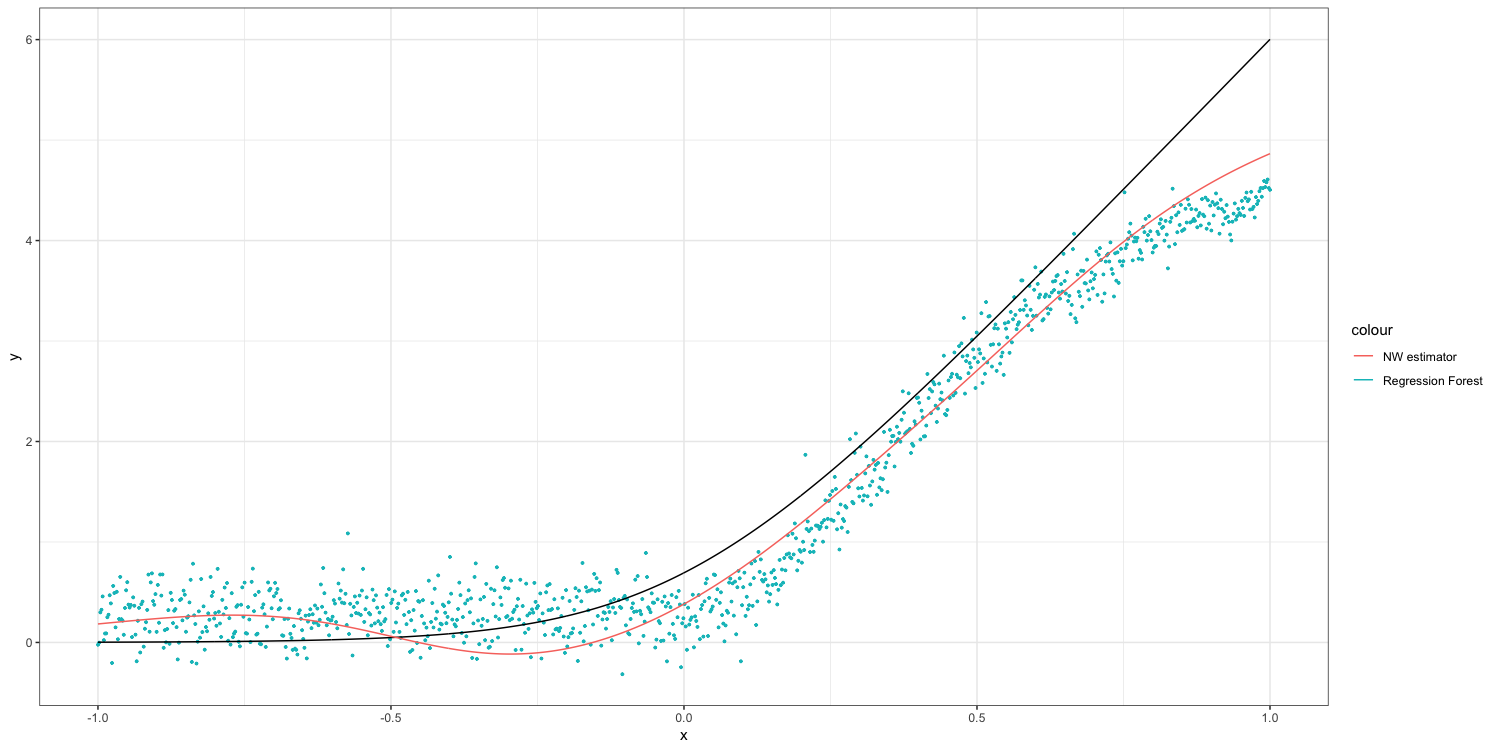

In [14]:
g1 <- plot_func("g1")
g1

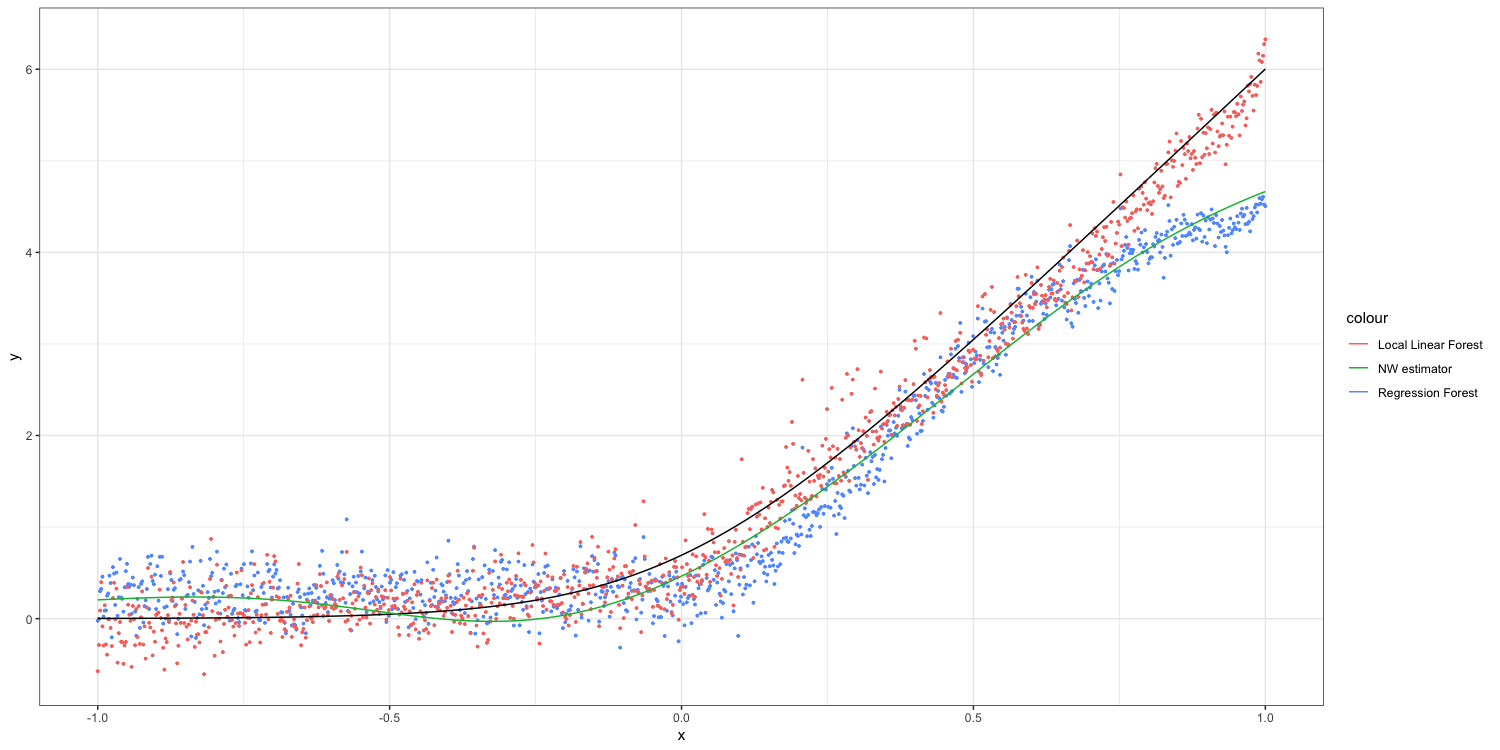

In [15]:
g2 <- plot_func("g2")
g2

4. **Sketching the proof of asymptotic normality for the basic regression forest**:

 - **Lipschitz continuity** of $\mu(x) = \mathbb{E}\left(Y \vert X = x\right)$ and  $\mathbb{E}\left(Y^2 \vert X = x\right)$
 - use **random subsample** of training data of size $s_n = n^{\beta}$ for some $\beta_{min}(d) < \beta < 1$ for constructing each tree.
 - **honesty**: for each tree, divide the drawn subsample into two disjoint sets (say $\mathcal{J},\mathcal{I}$) and use only data from $\mathcal{J}$ for constructing the tree.
 - **random-splits**: at every step of the tree-growing procedure, split on $j$-th covariate with positive probability.
 - **$\alpha$-regularity**: each split leaves at least fraction $\alpha$ of the available training sample on each side of the split and trees are fully grown to depth $k$ for some $k \in \mathbb{N}$ (deep trees + balancedness)
 - **symmetry**: the output of the tree predictor does not depend on the order ($i = 1, 2, . . \lceil\frac{s}{2}\rceil$) in which the training data is indexed.

4. **Sketching the proof of asymptotic normality for the basic regression forest**:

 - **Theorem 3.1 (S. Wager, S. Athey, 2018):**
 - Assume iid. data $Z_i = (X_i, Y_i)_{i=1}^n \in [0,1]^d \times \mathbb{R}$; suppose the covariates are uniformly distributed, $X_i \sim U ([0, 1]^d )$, that $\mu(x) = \mathbb{E}\left(Y \vert X = x\right)$ and  $\mathbb{E}\left(Y^2 \vert X = x\right)$ are Lipschitz-continuous and finally that $\mathbb{V}\left(Y \vert X = x\right) > 0$ and $\mathbb{E}\left[\big\vert Y - \mathbb{E}\left[ Y \big\vert X=x \right] \big\vert ^{2+\delta} \big \vert X=x \right] \leq M$ for some constants $\delta, M > 0$, uniformly over all $x \in [0,1]^d$.
 - Given this data-generating process, let $T$ be an honest, $\alpha$-regular with $\alpha \leq 0.2$, and symmetric random-split tree and let $\hat{\mu}_n(x)$ be the estimate for $\mu(x)$ given by a random with base learner $T$ and a subsample size $s_n$. Finally suppose the subsample size scales as
\begin{equation*}
s_n = n^{\beta} \quad \text{for some} \quad \beta_{min}(d,\alpha) < \beta < 1.
\end{equation*}
 - Then, there is a sequence $\sigma_n(x) \to 0$ such that
\begin{equation}
\frac{1}{\sigma_n(x)} \left( \hat{\mu}_n(x) - \mu(x) \right) \overset{d}{\to} \mathcal{N}(0, 1).
\end{equation}

#### Sidenode####

- even if we make progress on the individual trees, it is still not possible to easily see the limiting distribution of the random forest estimate $\hat{\mu}_n(x)$.
- one important method of deriving the asymptotic distribution of a sequence of statistics, here $\hat{\mu}_n (x)$, is to show that the sequence is asymptotically equivalent to a second sequence, say $\mathring{\hat{\mu}}_n$, the large sample properties of which are well-understood. 
- asymptotic properties of sums of independent random variables, are especially well-understood (since Central Limit Theorems (CLTs) are generally applicable to them)

- With this in mind, let $X_1, X_2, . . . , X_N$ be independent $K \times 1$ random vectors. Let $\mathcal{L}$ be the linear subspace containing of all functions of the form
\begin{equation}
\sum\limits_{i=1}^n g_i (X_i)
\end{equation}
for $g_i : \mathbb{R}^K \rightarrow \mathbb{R}$ arbitrary with $\mathbb{E} \left( g_i (X_i)^2 \right) < \infty$ for $i = 1,...,n$.


- Next let $Y$ (our RF or tree) be an arbitrary random variable with finite variance, but unknown distribution.
- We can use the Projection Theorem to approximate the statistic $Y$ with one composed of a sum of independent random functions. Such a sum, by appeal to a CLT, may be well-described by a normal distribution. If the projection is also a very good approximation of $Y$, then the hope is that $Y$  may be well-described by a normal distribution as well.
- This projection of $Y$ onto $\mathcal{L}$, called the **Hájek Projection**, equals

\begin{equation}
\mathring{Y} = \sum\limits_{i=1}^n \mathbb{E}\left( Y \vert X_i \right)  - (N-1) \mathbb{E}\left( Y\right)
\end{equation}
- Some properties:

\begin{equation}
\mathbb{E}(\mathring{Y}) = \mathbb{E}(Y)
\end{equation}
\begin{equation}
\mathbb{V}(\mathring{Y}) \leq \mathbb{V}(Y)
\end{equation}


- Next let $\{ Y_n\}$ (our RF estimate $\hat{\mu}_n(x)$) be a sequence of statistics indexed by the sample size $n$ and $\mathcal{L}_n$ a corresponding sequence of linear subspaces as before. The goal is to use the limiting distribution of 
\begin{equation}
Z_n \equiv \frac{1}{\sigma_n} \left(\mathring{Y}_n  - \mathbb{E}(\mathring{Y}_n)\right) \overset{d}{\to} F
\end{equation}
to approximate that of
\begin{equation}
G_n \equiv \frac{1}{\sigma_n}\left(Y_n  - \mathbb{E}(Y_n)\right)
\end{equation}
for some sequence of $\sigma_n$. Such an approach will be (asymptotically) valid if these two statistics converge in mean square to each other, since

\begin{equation}
Z_n - G_n  \overset{L_2}{\to} 0 \quad \text{and} \quad Z_n \overset{d}{\to} F \implies G_n \overset{d}{\to} F
\end{equation}


![](img/reg_tree.jpeg)

**Step 1: Bounding the bias of a single regression tree**

- By **$\alpha$-regularity** the total number of splits (on all covariates combined) leading to the leaf $L(x)$, namely $c(x)$ is bounded below by
\begin{equation}
c(x) \geq \frac{\text{log}\left(\frac{s}{2k - 1} \right) }{\text{log}\left(\alpha ^{-1} \right)} \equiv D \quad \text{holding with probability one}
\end{equation}
- Let $c_j(x)$ be the number of these splits along the $j$-th coordinate. Then, due to the **random-split** assumption, $\mathbb{P}\left(\textit{"split along $j$-th coordinate at any split"} \right) \geq \frac{\pi}{d}$, so
\begin{equation*}
\mathbb{P}\left( c_j(x) \leq b  \right) \leq \mathbb{P}\left( Z \leq b  \right) \quad \forall b
 \tag{1}
\end{equation*}
- where $Z \sim$ B $\left(D, \frac{\pi}{d} \right)$. Recall that for $U_1,..U_D$ sequence of $D$ independent Bernoulli experiments with $\mathbb{P}\left(U_i = 1 \right) = \frac{\pi}{d}$, such that $\frac{\pi}{d} \cdot D$ is the expected number of ones (splits on j-th covariate here), we have the Chernoff bound:
\begin{equation}
\mathbb{P}\left( \sum_{i=1}^D U_i \leq (1- \eta) \frac{\pi}{d} \cdot D  \right) \leq \text{exp}\left( -\frac{\eta^2}{2} \frac{\pi}{d} D  \right) \quad \forall \eta \in [0,1]
\end{equation}

- applying Chernoff bound to $D$ and using (1) directly gives 
\begin{equation}
\mathbb{P}\left( c_j(x) \leq (1- \eta) \frac{\pi}{d} \cdot D  \right) \leq \text{exp}\left( -\frac{\eta^2}{2} \frac{\pi}{d} D  \right) \quad \forall \eta \in [0,1]
\tag{2}
\end{equation}
- now, with only one more insight we **can bound the so called diameter of a leaf of any tree, which directly translates into a bound on the bias**.
- define the diameter diam$(L(x))$ of a leaf as the length of longest segment contained inside $L(x)$, similarly let $\text{diam}_j(L(x))$ denote length of longest such segment that is parallel to the $j$-th axis.
- one can confirm formally that
\begin{equation}
\text{diam}_j(L(x)) \leq (1-\alpha + o(1))^{(1 + o(1)) c_j(x)} \quad \text{holding with probability one}
\tag{3}
\end{equation}
- This means we can use (3) to express (2) in terms of $\text{diam}_j(x)$, which gives the desired bound:
\begin{equation}
\mathbb{P}\left( \text{diam}_j(L(x)) \geq a_{s_n}(\eta,\alpha,d,k)  \right) \leq b_{s_n}(\eta,\alpha,d,k)
\tag{*}
\end{equation} 
- where
\begin{equation}
\text{lim}_{s_n \to \infty} a_{s_n} = 0 \quad \textit{and} \quad \text{lim}_{s_n \to \infty} b_{s_n} = 0
\end{equation}

- Let $\alpha = 0.2$ and $c_j(x) = 2$ be the given number of splits on the $j$-th covariate. Then intuitively, the "worst case" splits which would result in the largest maximum interval length parallel to the $j$-th axis (i.e. length of longest segment contained in any leaf, along the $j$-th axis) would look like this: 

![](img/test.jpeg)

#### Bias of a tree:  
 - **regression trees**: for each tree $T_b$, given a new test point $x$, identify the leaf $L_b(x)$ containing $x$ and set the tree estimate:
\begin{equation}
T_b(x; \Theta, Z_1,..,Z_s) = \frac{1}{\vert \{k \in \mathcal{I}: X_k \in L(x;\Theta,Z)) \} \vert } \sum_{\{k \in \mathcal{I}: X_k \in L(x;\Theta,Z)\}} Y_k  = \sum_{i=1}^{\vert \mathcal{I} \vert} S_i Y_i 
\end{equation}
- where
\begin{equation}
S_i = \begin{cases} 
      \frac{1}{\vert \{k \in \mathcal{I}: X_k \in L(x;\Theta,Z))\} \vert } & X_i \in L(x;\Theta,Z) \\
      0 & otherwise
   \end{cases}
\end{equation}
- this implies by **honesty**
\begin{align*}
\mathbb{E}\left[ T_b(x;Z)\right] &= \mathbb{E} \left[ \sum_{i=1}^{\vert \mathcal{I} \vert} S_i Y_i \right] = \vert \mathcal{I} \vert \cdot \mathbb{E} \left[ \mathbb{E} \left[ S_i Y_i \; \big\vert\; X_1 \in L(x),...,X_{\vert \mathcal{I} \vert} \in L(x) \right] \right]  \\
& = \mathbb{E} \left[ \mathbb{E} \left[ Y_i \; \big\vert\; X_i \in L(x) \right] \right] 
\end{align*}

- Having a look at the bias:

\begin{equation}
\mathbb{E}\left[ T_b(x;Z)\right] -  \mathbb{E}\left[Y_i\; \vert\; X_i = x \right]  = \mathbb{E} \left[ \mathbb{E} \left[ Y_i \; \big\vert\; X_i \in L(x) \right] - \mathbb{E}\left[ Y_i \;\big\vert\; X_i=x\right]\right]
\end{equation}

- So the distance of the inner part above can be bounded by **Lipschitz continuity of the conditional mean function**:
\begin{equation}
\big\vert  \mathbb{E}\left[  Y_i \;\big\vert\; X_i \in L(x) \right] - \mathbb{E}\left[ Y_i \; \big\vert\; X_i=x\right]  \big\vert  \leq C \cdot \text{diam}(L(x)) \quad \text{with probability one}
\end{equation}

- From here, by **using the bound $(*)$ on $\text{diam}_j(L(x)$ from before**, it is easy to show that

\begin{equation}
\big\vert \mathbb{E}\left[ T_b(x;Z) \right] - \mathbb{E}\left[Y_i\; \vert\; X_i = x \right] \big\vert = \big\vert \mathbb{E}\left[ \hat{\mu}(x) \right] - \mu(x) \big\vert =  \mathcal{O}(\tilde{b}_{s_n}), \quad lim_{s_n \to \infty} \tilde{b}_{s_n} = 0
\end{equation}

- **Recall**: The goal is to use the limiting distribution of 
\begin{equation}
Z_n \equiv \frac{1}{\sigma_n} \left(\mathring{Y}_n  - \mathbb{E}(\mathring{Y}_n)\right) \overset{d}{\to} F  \quad (\,\text{here}\; \mathring{Y}_n = \mathring{\hat{\mu}}_n(x) )
\end{equation}
to approximate that of
\begin{equation}
G_n \equiv \frac{1}{\sigma_n}\left(Y_n  - \mathbb{E}(Y_n)\right) \quad (\,\text{here}\; Y_n = \hat{\mu}_n(x) )
\end{equation}
for some sequence of $\sigma_n$. Such an approach will be (asymptotically) valid if these two statistics converge in mean square to each other, since

\begin{equation}
Z_n - G_n  \overset{L_2}{\to} 0 \quad \text{and} \quad Z_n \overset{d}{\to} F \implies G_n \overset{d}{\to} F
\end{equation}

- We focus on $Z_n - G_n  \overset{L_2}{\to} 0$ since the other part is solely applying the Lyapunov central limit theorem to check that $Z_n$ is asymptotically normal. Note that since $\mathbb{E}(Y_n) = \mathbb{E}(\mathring{Y}_n)$, for $Z_n - G_n  \overset{L_2}{\to} 0$ to hold it suffices to show 

\begin{equation}
\frac{1}{\sigma_n^2}  \mathbb{E}\left[ \left( \hat{\mu}_n(x) - \mathring{\hat{\mu}}_n(x) \right) ^2 \right]  \to 0.
\end{equation}


**Step 2: Two technical results on individual trees:**

1. Suppose that all regularity conditions on the trees as stated hold; then we have
\begin{equation}
\frac{ \mathbb{V} \left[ \mathring{T}(x; Z_1,...,Z_s) \right] }{\mathbb{V} \left[ T(x; Z_1,...,Z_s) \right]} \gtrsim \frac{A}{log(s)^d}
\end{equation}
where $\mathring{T}$ is the Hájek projection of $T$ and $f(s) \gtrsim g(s)$ means that $\liminf\limits_{s\rightarrow \infty} \frac{f(s)}{g(s)} \geq 1.$
2. Let $\hat{\mu}(x)$ be the estimate for $\mu(x)$ generated by a random forest with base learner $T$ as defined before, and let $\mathring{\hat{\mu}}(x)$ be the Hájek projection of $\hat{\mu}(x)$. Then
\begin{equation}
\mathbb{E}\left[ \left( \hat{\mu}_n(x) - \mathring{\hat{\mu}}_n(x) \right) ^2 \right] \leq \left(\frac{s}{n}\right)^2 \cdot \mathbb{V}(T(x; Z_1,...,Z_s))
\end{equation}

**Step 3: $Z_n - G_n  \overset{L_2}{\to} 0$ for some sequence $\sigma_n$:**

- One can show that the Hájek projection of a tree $T$ can be written as
\begin{equation}
\mathring{T}(Z_1,...,Z_s) = \mathbb{E}(T) + \sum_{i=1}^s T_1 (Z_i)  \implies \mathbb{V}(\mathring{T}) = s \cdot \mathbb{V}(T_1(Z_1))
\end{equation}
- where $T_1$ is some function from the Efron-Stein decomposition. Equivalently, the Hájek projection of $\hat{\mu}$ is expressable as
\begin{equation}
\mathring{\hat{\mu}}(x; Z_1,...,Z_n) = \mathbb{E}(T) + \frac{s}{n} \sum_{i=1}^n T_1 (Z_i)  \implies \mathbb{V}(\mathring{\hat{\mu}}) = \frac{s^2}{n} \cdot \mathbb{V}(T_1(Z_1)) \equiv \sigma_n^2
\end{equation}
- From this we get that
\begin{equation}
\sigma_n^2 = \frac{s^2}{n} \cdot \mathbb{V}(T_1(Z_1))  = \frac{s}{n} \cdot  \mathbb{V}(\mathring{T}) \leq \frac{s}{n} \mathbb{V}(T) \to 0
\end{equation}
- as desired. Then
\begin{align*}
\frac{1}{\sigma_n^2}  \mathbb{E}\left[ \left( \hat{\mu}(x) - \mathring{\hat{\mu}}(x) \right) ^2 \right]   &\leq  \left(\frac{s}{n}\right)^2 \cdot \frac{\mathbb{V}(T(x; Z_1,...,Z_s)}{\sigma_n^2} \\
& = \frac{s}{n} \cdot \frac{\mathbb{V}(T)}{\mathbb{V}(\mathring{T})} \\
& \lesssim  \frac{s}{n} \cdot \frac{log(s)^d}{A} \to 0.
\end{align*}

**Final note:**

- We have shown
\begin{equation}
\frac{1}{\sigma_n^2}  \mathbb{E}\left[ \left( \hat{\mu}_n(x) - \mathring{\hat{\mu}}_n(x) \right) ^2 \right]  \to 0.
\end{equation}
- Given that 
\begin{equation}
Z_n \equiv \frac{1}{\sigma_n} \left(\mathring{\hat{\mu}}_n(x)  - \mathbb{E}(\mathring{\hat{\mu}}_n(x))\right) \overset{d}{\to} \mathcal{N}(0, 1)
\tag{**}
\end{equation}
- we have 
\begin{equation}
G_n \equiv \frac{1}{\sigma_n}\left(\hat{\mu}_n(x) - \mathbb{E}(\hat{\mu}_n(x))\right) \overset{d}{\to} \mathcal{N}(0, 1)
\end{equation}


- it only remains to show that $(**)$ holds with $\mathbb{E}(\hat{\mu}_n(x))$ replaced with $\mu(x)$. This is relatively straightforward to verify via our consistency result before:

\begin{equation}
\big\vert \mathbb{E}\left[ \hat{\mu}(x) \right] - \mu(x) \big\vert =  \mathcal{O}(\tilde{b}_{s_n}), \quad lim_{s_n \to \infty} \tilde{b}_{s_n} = 0
\end{equation}